In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<Axes: >

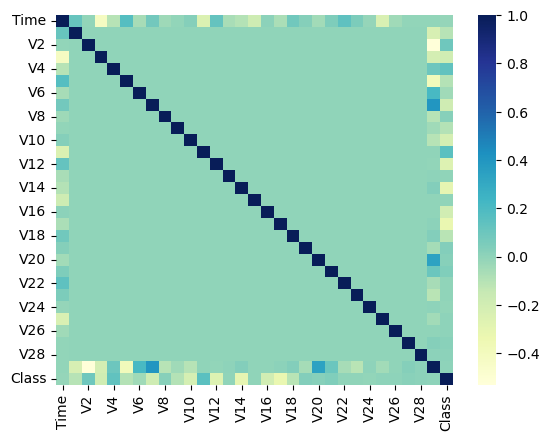

In [7]:
sns.heatmap(data.corr(),cmap='YlGnBu')

In [8]:
# Number of legit transactions vs Fraudylent transaction

data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

The data is highly unbalanced, so we need to preprocess the data before training 

In [9]:
legit = data[data['Class']==0]
fraud= data[data['Class']==1]
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [10]:
legit['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
# compare the values for both transaction
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### Under-Sampling

#### Building a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of fraudulent transactions are 492. So we are going to picks 492 legit random transactions and combine it with fraudulent data to make a good uniform dataset.

In [13]:
legit_sample=legit.sample(n=492)

In [14]:
new_data=pd.concat([legit_sample,fraud],axis=0)

In [15]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
199119,132818.0,1.900162,-1.535026,-0.764826,-1.324694,0.693684,4.697543,-2.238680,1.401895,2.920708,...,0.072984,0.690469,0.197406,0.816287,-0.345196,0.812830,0.058115,-0.044979,17.00,0
99125,66975.0,0.961604,-1.935646,-0.241982,-1.015313,-1.525515,-0.506641,-0.479874,-0.176602,-1.667750,...,-0.031204,-0.211204,-0.280372,0.076961,0.464897,-0.059499,-0.026467,0.050651,285.71,0
248087,153790.0,-0.796549,-0.157581,1.957298,-2.309120,-0.945076,0.508881,-0.653510,0.391550,0.904317,...,0.057955,0.662027,-0.233844,-0.507669,-0.262463,-0.290145,0.461195,0.097087,2.00,0
154891,103522.0,1.959992,-0.197798,-1.686169,-0.035351,1.155147,1.250213,-0.343825,0.288950,1.955275,...,0.192104,0.976043,0.026238,-1.007474,0.141570,-0.373687,0.015857,-0.082945,1.00,0
26281,33984.0,1.015496,0.000630,0.455336,1.364574,-0.247286,0.042451,0.023327,0.114481,0.032580,...,-0.009506,0.057034,-0.089603,0.243594,0.583863,-0.347477,0.026428,0.015915,56.00,0


In [16]:
new_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [17]:
new_data['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [18]:
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96366.762195,0.006330,-0.008774,-0.011397,0.045742,0.025651,-0.022953,0.079169,0.010705,-0.028829,...,-0.043823,-0.025080,0.057286,-0.004390,0.005176,0.053026,-0.040257,-0.006316,0.008682,89.136179
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [19]:
X=new_data.drop('Class',axis=1)
y=new_data['Class']
print(X.head())
y.head()

            Time        V1        V2        V3        V4        V5        V6  \
199119  132818.0  1.900162 -1.535026 -0.764826 -1.324694  0.693684  4.697543   
99125    66975.0  0.961604 -1.935646 -0.241982 -1.015313 -1.525515 -0.506641   
248087  153790.0 -0.796549 -0.157581  1.957298 -2.309120 -0.945076  0.508881   
154891  103522.0  1.959992 -0.197798 -1.686169 -0.035351  1.155147  1.250213   
26281    33984.0  1.015496  0.000630  0.455336  1.364574 -0.247286  0.042451   

              V7        V8        V9  ...       V20       V21       V22  \
199119 -2.238680  1.401895  2.920708  ... -0.101015  0.072984  0.690469   
99125  -0.479874 -0.176602 -1.667750  ...  0.092001 -0.031204 -0.211204   
248087 -0.653510  0.391550  0.904317  ...  0.291016  0.057955  0.662027   
154891 -0.343825  0.288950  1.955275  ... -0.391743  0.192104  0.976043   
26281   0.023327  0.114481  0.032580  ... -0.097636 -0.009506  0.057034   

             V23       V24       V25       V26       V27       V28  

199119    0
99125     0
248087    0
154891    0
26281     0
Name: Class, dtype: int64

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [21]:
model=LogisticRegression()

model.fit(X_train,y_train)

LogisticRegression()

In [22]:
X_train_pred=model.predict(X_train)
accuracy_training_data=accuracy_score(X_train_pred,y_train)
accuracy_training_data

0.9377382465057179

In [23]:
print(classification_report(X_train_pred,y_train))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       414
           1       0.91      0.96      0.94       373

    accuracy                           0.94       787
   macro avg       0.94      0.94      0.94       787
weighted avg       0.94      0.94      0.94       787



In [24]:
X_test_pred=model.predict(X_test)
accuracy_testing_data=accuracy_score(X_test_pred,y_test)
accuracy_testing_data

0.9543147208121827

In [25]:
print(classification_report(X_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        98
           1       0.96      0.95      0.95        99

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197

